      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 3

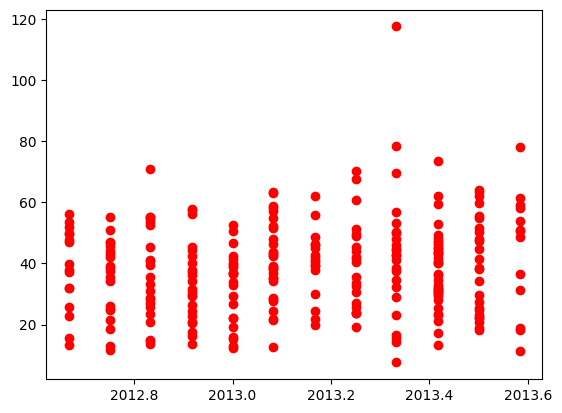

[2013.5   2012.667 2013.417 2013.5   2013.583 2013.25  2012.917 2013.083
 2013.    2012.667 2013.25  2013.083 2013.5   2012.75  2012.75  2012.917
 2012.667 2013.167 2013.    2013.5   2013.417 2013.583 2013.083 2013.583
 2013.417 2012.667 2013.417 2013.083 2012.833 2013.417 2013.5   2013.083
 2013.417 2013.5   2013.    2013.417 2013.583 2013.167 2012.917 2013.
 2012.917 2013.083 2012.75  2012.833 2013.5   2012.917 2013.417 2013.417
 2013.5   2012.75  2012.833 2013.083 2013.333 2013.083 2013.    2013.
 2013.5   2013.25  2012.917 2013.167 2013.083 2012.833 2012.917 2012.75
 2013.5   2013.25  2013.083 2012.917 2012.75  2013.5   2013.333 2013.5
 2013.583 2013.    2012.917 2012.75  2013.5   2012.833 2012.917 2013.417
 2013.417 2013.333 2013.083 2013.583 2013.083 2013.417 2013.083 2012.667
 2013.167 2013.5   2012.75  2013.    2012.917 2012.917 2013.167 2013.167
 2013.417 2013.333 2013.    2013.083 2013.417 2013.417 2013.417 2012.917
 2013.    2013.083 2013.083 2012.75  2012.833 2013.083 2013.

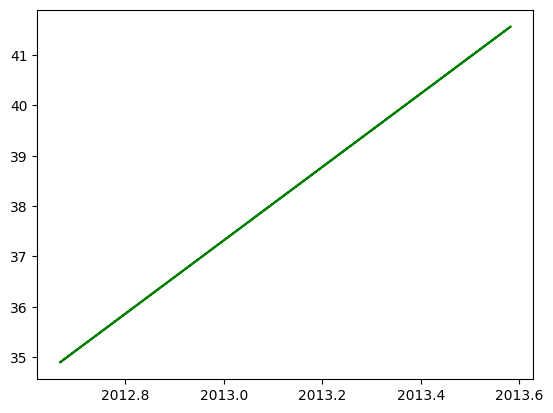

Please enter X1 transaction date


Enter the value 2013


Y house price of unit area: 37.32066856634265


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

data = pd.read_csv('Real estate.csv')

df1 = pd.DataFrame(data)
print(df1)
df2 = df1.drop(["No","X3 distance to the nearest MRT station","X4 number of convenience stores","X5 latitude","X6 longitude"],axis = 1)
df2.isnull()
df3 = df2.dropna()
print(df3)
print(df3.duplicated())
df3 = df3.drop_duplicates()
print(df3)
df4=df3.duplicated(subset=['Y house price of unit area'])
df4 = df3.drop_duplicates(subset=['Y house price of unit area'],keep='last')
print(df4)
df4.reset_index(inplace=True,drop=True)
print(df4)
plt.scatter(df4['X1 transaction date'],df4['Y house price of unit area'],color='red')
plt.show()
regr = linear_model.LinearRegression()
x=np.asanyarray(df4['X1 transaction date'])
y = np.asanyarray(df4['Y house price of unit area'])
print(x)
print(y)
X = x.reshape(-1,1)
print(X)
Y=regr.fit(X,y)
plt.plot(x,regr.predict(X), color = "g")
plt.show()
print("Please enter X1 transaction date")
d = int(input('Enter the value'))
b = regr.predict([[d]])[0]
print("Y house price of unit area: {}".format(b))